# "titanic"

- toc:true
- branch: master
- badges: true
- comments: true
- author: hayley
- categories: [ml project]
- date : 2022-10-30 01:32:09

# 한글 폰트 설정 

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

#레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Kaggle과 Colab 연동 

In [2]:
!pip install kaggle 
from google.colab import files 
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minaahayley","key":"3af569f6a8c028e6233a6d29ce2439d3"}'}

In [3]:
ls -1ha kaggle.json

kaggle.json


In [4]:
!mkdir -p ~/.kaggle #create folder name Kaggle
!cp kaggle.json ~/.kaggle #copy kaggle.jason into folder Kaggle
!chmod 600 ~/.kaggle/kaggle.json #ignore Permission Warning 

In [5]:
#다운로드가 제대로 되었는지 확인한다. 
#ls 명령어는 특정 경로에 어떤 파일이 있는지 확인해 보는 명령어다. 
%ls ~/.kaggle

kaggle.json


In [6]:
#Copy API command 후 데이터셋 다운로드하기  
!kaggle competitions download -c titanic

#파일 압축 풀기
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 27.3MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
!mkdir -p ~/.kaggle/competitions/titanic #create folder name Kaggle
!cp gender_submission.csv ~/.kaggle/competitions/titanic #copy into folder Kaggle
!cp test.csv ~/.kaggle/competitions/titanic
!cp train.csv ~/.kaggle/competitions/titanic

In [9]:
#다운로드가 제대로 되었는지 확인한다. 
#ls 명령어는 특정 경로에 어떤 파일이 있는지 확인해 보는 명령어다. 
%ls ~/.kaggle/competitions/titanic

gender_submission.csv  test.csv  train.csv


# 데이터 전처리 

In [173]:
import pandas as pd 

In [174]:
submission = pd.read_csv('~/.kaggle/competitions/titanic/gender_submission.csv')
test = pd.read_csv('~/.kaggle/competitions/titanic/test.csv')
train = pd.read_csv('~/.kaggle/competitions/titanic/train.csv')

In [175]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Age, Cabin, Embarked의 null 값을 채워줘야 한다. 

In [177]:
# Age, Cabin, Embarked의 null 값을 채워준다. 
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Cabin'].fillna('N', inplace=True)
train['Embarked'].fillna('N', inplace=True)
train['Fare'].fillna(0, inplace=True)

test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Cabin'].fillna('N', inplace=True)
test['Embarked'].fillna('N', inplace=True)
test['Fare'].fillna(0, inplace=True)

In [178]:
train['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [179]:
train['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [180]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [181]:
# Cabin 선실 번호의 경우 앞자리만 데이터 전처리를 해줘야 한다. 
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

# EDA 
* 가설 1 : 어린이, 노약자, 여성일수록 생존 확률이 높을 것이다.  
* 가설 2 : 부자일수록 생존 확률이 높을 것이다. 

In [182]:
import seaborn as sns 

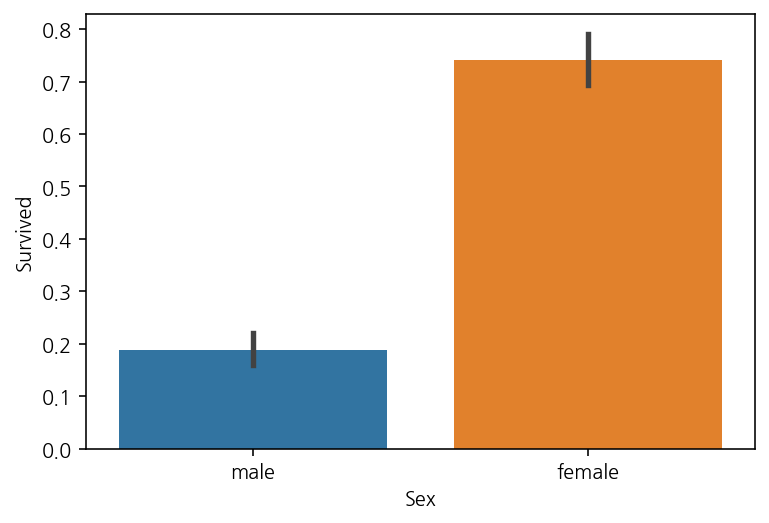

In [183]:
sns.barplot(x='Sex', y='Survived', data=train)

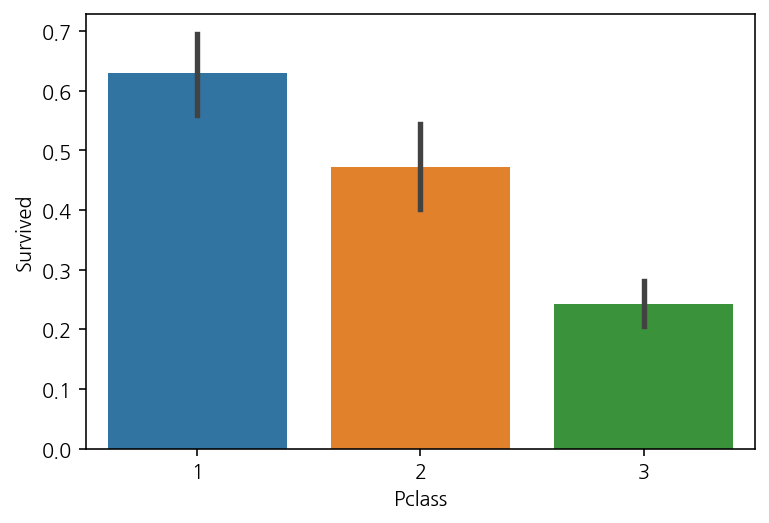

In [184]:
sns.barplot(x='Pclass', y='Survived', data=train)

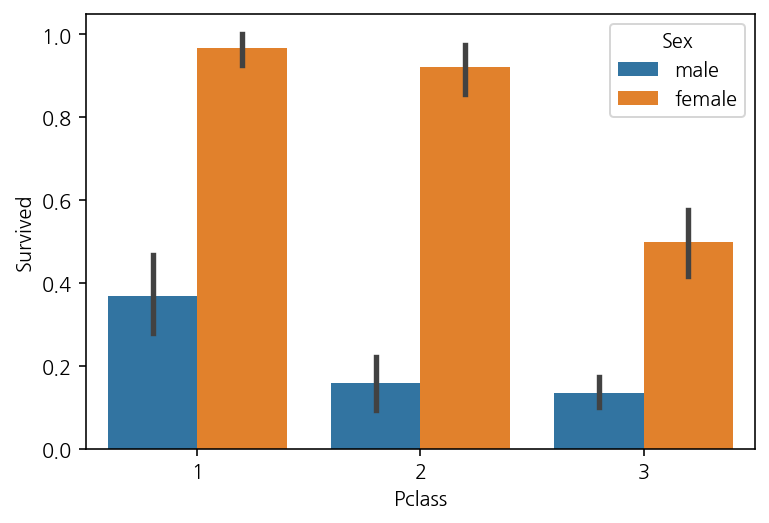

In [185]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

* 여성일 경우 일등석, 이등석에 따른 생존 확률이 큰 차이는 없으나, 삼등석일 경우 생존 확률이 크게 떨어진다. 

* 남성일 경우 일등석의 생존 확률이, 이등석, 삼등석보다 높다. 

In [186]:
train['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [187]:
train['Age_cat'] = train['Age'].apply(lambda x : 'Over 45' if x >= 45 else '35-44' if x >=35 else '25-34' if x >= 25 else '15-24' if x >= 15 else '5-14' if x >=5 else 'Under 5')
train['Age_cat'].value_counts() 

25-34      378
15-24      200
35-44      120
Over 45    115
Under 5     40
5-14        38
Name: Age_cat, dtype: int64

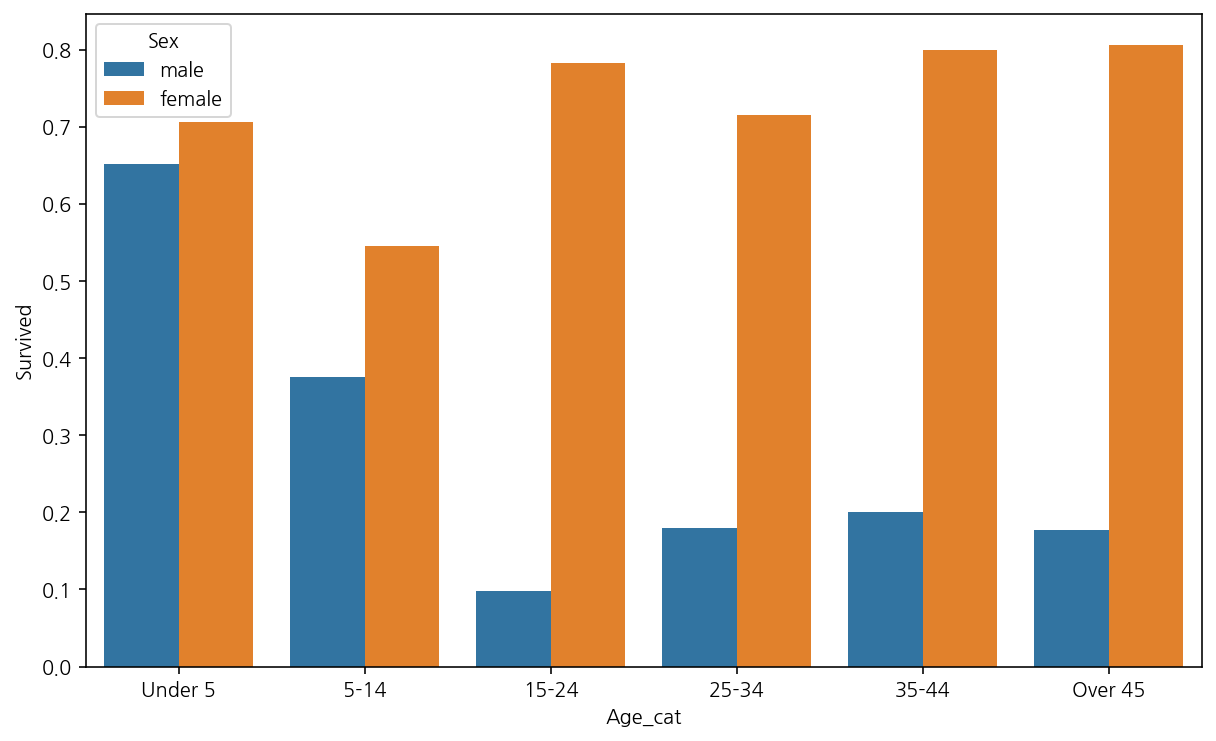

In [188]:
# X축의 값을 순차적으로 표시 
order = ['Under 5', '5-14', '15-24', '25-34', '35-44', 'Over 45']

plt.figure(figsize=(10,6))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=train, order=order, ci=None)

인사이트 
* 여성일 경우 어린이, 노약자일수록 생존 확률이 높다. 
* 남성일 경우 어린이의 생존 확률이 압도적으로 높다. 

Sex, Age, Pclass 등이 생존을 결정하는 중요한 피처임을 알 수 있다. 

# Feature Engineering

In [192]:
# submission을 위해 passengerId는 별도로 저장 
test_passengerId = test['PassengerId'] 

## Feature Selection

In [193]:
# 피처 제거 
train.drop(['Name','Age_cat', 'PassengerId', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

## label encoding 

* 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환한다. 

In [194]:
from sklearn.preprocessing import LabelEncoder 

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features: 
      le = LabelEncoder()
      le = le.fit(df[feature])
      df[feature] = le.transform(df[feature])

    return df 

In [195]:
train = encode_features(train)
test = encode_features(test)

# Modeling

## 결정 트리, 랜덤 포레트스, 로지스틱 회귀 
* 로지스틱 회귀는 이름은 회귀이지만 매우 강력한 분류 알고리즘 
* solver='liblinear'는 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정하는 것이다. 
  일반적으로 작은 데이터셋에서의 이진 분류는 liblinear가 성능이 약간 더 좋다.

In [196]:
# 입력변수 X, 목표변수 y 설정 
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [197]:
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=11)

In [198]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

# Classifier 클래스 생성 
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# 결정 트리 학습/예측/평가 
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(X_val)
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_val, dt_predict)))

# 랜덤 포레스트 학습/예측/평가 
rf_clf.fit(X_train, y_train)
rf_predict = rf_clf.predict(X_val)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_val, rf_predict)))

# 로지스틱 회귀 학습/예측/평가 
lr_clf.fit(X_train, y_train)
lr_predict = lr_clf.predict(X_val)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy_score(y_val, lr_predict)))

결정 트리 정확도: 0.7877
랜덤 포레스트 정확도: 0.8547
로지스틱 회귀 정확도: 0.8659


## K폴드 교차 검증 

In [199]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(dt_clf, X_train, y_train, cv=5)

In [200]:
import numpy as np

print('평균 정확도: {0:.4f}'.format((np.mean(scores))))

평균 정확도: 0.7711


## 하이퍼 파라미터 튜닝 

In [201]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,5,10],
              'min_samples_split': [2,3,5],
              'min_samples_leaf':[1,5,8]}

grid_dt_clf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [202]:
# 최적 하이퍼 파라미터 
grid_dt_clf.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [203]:
# 최고 정확도
grid_dt_clf.best_score_

0.7991825076332119

In [211]:
# 최적 하이퍼 파라미터로 학습된 Estimator로 예측, 평가 
estimator = grid_dt_clf.best_estimator_ 
y_val_predict = estimator.predict(X_val)
accuracy = accuracy_score(y_val, y_val_predict)

accuracy

0.8715083798882681

In [214]:
# 최종 예측 
predict = estimator.predict(test)
predict[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

# Submission 

In [207]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [215]:
# 새로운 데이터프레임을 생성하고, 거기에 PassengerId와 예측한 결과값인 predict를 넣어준다
submission = pd.DataFrame()
submission['PassengerId'] = test_passengerId
submission['Survived'] = predict 

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [216]:
submission.to_csv('submission_dt.csv', index=False)

0.78468

In [218]:
1957/14654 # 상위 13% 

0.13354715436058415